In [1]:
import tkinter as tk
import os
import reinforcement_learning as rl
from taxi_environment import *

In [2]:
# '''testing the policy update method'''
# pi = rl.policy(sa_dict=dict())

# s1 = rl.state(taxi_i=0, taxi_j=0, 
#               pass_i=8, pass_j=8, 
#               dest_i=6, dest_j=9, pass_picked=False)

# a1 = 'e'
# q1 = rl.Q(s=s1, a=a1)
# q1.value = 1
# pi.update(s=s1, a=a1, q=q1)
# q1.value = 1.3
# pi.update(s=s1, a=a1, q=q1)

# s2 = s1
# a2 = 'w'
# q2 = rl.Q(s=s2, a=a2)
# q2.value = 2
# pi.update(s=s2, a=a2, q=q2)

# for a, q in pi.sa_dict[s2]:
#     print("a=%s: Q=%s" % (a, q.value))
# pi.get_maxQ_action(s1)

In [2]:
# see what the taxi environemtn looks like
# create simualted environemnt 
gui = tk.Tk()
env = Environment(gui=gui, grid=huge_grid)

# for Manual move
#root.bind("<Key>", env.move)
gui.bind("<space>", env.passActions)
gui.bind('<Left>', env.moveLeft)
gui.bind('<Right>', env.moveRight)
gui.bind('<Up>', env.moveUp)
gui.bind('<Down>', env.moveDown)
gui.mainloop()

In [4]:
import time
import matplotlib.pyplot as plt
%matplotlib inline

# Q(s,a) table key = <s,a> pair, value = Q value(s,a) value 
# Q update parameters
init_alpha = 0.3
min_alpha = 0.1
gamma = 0.7
Qt = rl.Qtable(init_alpha=init_alpha, min_alpha=min_alpha, gamma=gamma)

# policy parameters
init_epsilon = 0.5
min_epsilon = 0.1
# define policy object
pi = rl.policy(init_epsilon=init_epsilon, min_epsilon=min_epsilon)

grid = small_grid
epochs = 100

# x and y points list for plotting progress
epoch_list = list()
q_list = list()
episode_list = list()            

# Train our rl algorithm to converge our Q values*
for epoch in range(epochs):   
    
    gui = tk.Tk()
    env = Environment(gui=gui, grid=grid)
    rand_s = get_state(env, taxi_i=env.dest_i-1, pass_picked=False)
    rand_a = 'e'

    # get initial <s1, a1, s2, r>
    s1 = get_state(env)
    a1 = 'e'
    s2 = rl.state()
    r = 0     

    episode = 0
    while not env.task_complete:
        episode += 1
        # choose action to take in state s1
        allowed_actions = env.get_allowed_actions()
        a1 = pi.get_action(s=s1, epoch=epoch, allowed_actions=allowed_actions)
        r = env.execute_action(a1)

        # get state s2
        s2 = get_state(env)
        
        # create expericne tuple <s1,a1,s2,r>
        exp = rl.experience(s1, a1, s2, r)

        #print("Q(s1,a1) before update: ", Qt.get_Q(s1, a1).value)
        # update Q(s1,a1) using <s1,a1,s2,r>
        Qt.update(exp=exp, pi=pi, epoch=epoch)
        #print("Q(s1,a1) after update: ", Qt.get_Q(s1, a1).value)

        # update the policy with our updated Q(s1,a1) value
        pi.update(s1, a1, Qt.get_Q(s1, a1))

        s1 = s2
    
    # destroy gui and create a new one for the next iteration
    gui.destroy()
    
    # record data for plotting and print progress
    if (epoch > 0):
        epoch_list.append(epoch)
        q_list.append(Qt.get_Q(rand_s, rand_a).value)  
        episode_list.append(episode)
        if epoch % 10 == 0:
            epsilon = pi.get_epsilon(epoch)
            print("epoch: %d,    episodes: %d,    epsilon: %.2g" % (epoch, episode, epsilon))

epoch: 10,    episodes: 2791,    epsilon: 0.49
epoch: 20,    episodes: 2364,    epsilon: 0.48
epoch: 30,    episodes: 6421,    epsilon: 0.47
epoch: 40,    episodes: 230,    epsilon: 0.46
epoch: 50,    episodes: 599,    epsilon: 0.45
epoch: 60,    episodes: 296,    epsilon: 0.44
epoch: 70,    episodes: 106,    epsilon: 0.43
epoch: 80,    episodes: 118,    epsilon: 0.42
epoch: 90,    episodes: 43,    epsilon: 0.41


In [5]:
len(Qt.table)

592927

In [6]:
# Q(s,a) table key = <s,a> pair, value = Q value(s,a) value 
# Q update parameters
init_alpha = 0.3
min_alpha = 0.1
gamma = 0.7
Qt = rl.Qtable(init_alpha=init_alpha, min_alpha=min_alpha, gamma=gamma, q_table=Qt.table.copy())

# policy parameters
init_epsilon = 0.5
min_epsilon = 0.1
# define policy object
pi = rl.policy(init_epsilon=init_epsilon, min_epsilon=min_epsilon, sa_dict=pi.sa_dict.copy())

grid = big_grid
epochs = 300

# x and y points list for plotting progress
epoch_list = list()
q_list = list()
episode_list = list()            

# Train our rl algorithm to converge our Q values*
for epoch in range(epochs):   
    
    gui = tk.Tk()
    env = Environment(gui=gui, grid=grid)
    rand_s = get_state(env, taxi_i=env.dest_i-1, pass_picked=False)
    rand_a = 'e'

    # get initial <s1, a1, s2, r>
    s1 = get_state(env)
    a1 = 'e'
    s2 = rl.state()
    r = 0     

    episode = 0
    while not env.task_complete:
        episode += 1
        # choose action to take in state s1
        allowed_actions = env.get_allowed_actions()
        a1 = pi.get_action(s=s1, epoch=epoch, allowed_actions=allowed_actions)
        r = env.execute_action(a1)

        # get state s2
        s2 = get_state(env)
        
        # create expericne tuple <s1,a1,s2,r>
        exp = rl.experience(s1, a1, s2, r)

        #print("Q(s1,a1) before update: ", Qt.get_Q(s1, a1).value)
        # update Q(s1,a1) using <s1,a1,s2,r>
        Qt.update(exp=exp, pi=pi, epoch=epoch)
        #print("Q(s1,a1) after update: ", Qt.get_Q(s1, a1).value)

        # update the policy with our updated Q(s1,a1) value
        pi.update(s1, a1, Qt.get_Q(s1, a1))

        s1 = s2
    
    # destroy gui and create a new one for the next iteration
    gui.destroy()
    
    # record data for plotting and print progress
    if (epoch > 0):
        epoch_list.append(epoch)
        q_list.append(Qt.get_Q(rand_s, rand_a).value)  
        episode_list.append(episode)
        if epoch % 10 == 0:
            epsilon = pi.get_epsilon(epoch)
            print("epoch: %d,    episodes: %d,    epsilon: %.2g" % (epoch, episode, epsilon))

epoch: 10,    episodes: 87635,    epsilon: 0.49
epoch: 20,    episodes: 8145,    epsilon: 0.48
epoch: 30,    episodes: 2973,    epsilon: 0.47
epoch: 40,    episodes: 8843,    epsilon: 0.46
epoch: 50,    episodes: 10829,    epsilon: 0.45
epoch: 60,    episodes: 1917,    epsilon: 0.44
epoch: 70,    episodes: 486,    epsilon: 0.43
epoch: 80,    episodes: 416,    epsilon: 0.42
epoch: 90,    episodes: 349,    epsilon: 0.41
epoch: 100,    episodes: 984,    epsilon: 0.4
epoch: 110,    episodes: 102,    epsilon: 0.39
epoch: 120,    episodes: 323,    epsilon: 0.38
epoch: 130,    episodes: 273,    epsilon: 0.37
epoch: 140,    episodes: 60,    epsilon: 0.36
epoch: 150,    episodes: 373,    epsilon: 0.35
epoch: 160,    episodes: 107,    epsilon: 0.34
epoch: 170,    episodes: 784,    epsilon: 0.33
epoch: 180,    episodes: 73,    epsilon: 0.32
epoch: 190,    episodes: 103,    epsilon: 0.31
epoch: 200,    episodes: 253,    epsilon: 0.3
epoch: 210,    episodes: 109,    epsilon: 0.29
epoch: 220,    epi

In [8]:
len(Qt.table)

773148

In [12]:
# Q(s,a) table key = <s,a> pair, value = Q value(s,a) value 
# Q update parameters
init_alpha = 0.3
min_alpha = 0.1
gamma = 0.7
Qt = rl.Qtable(init_alpha=init_alpha, min_alpha=min_alpha, gamma=gamma, q_table=Qt.table.copy())

# policy parameters
init_epsilon = 0.5
min_epsilon = 0.1
# define policy object
pi = rl.policy(init_epsilon=init_epsilon, min_epsilon=min_epsilon, sa_dict=pi.sa_dict.copy())

grid = huge_grid
epochs = 500

# x and y points list for plotting progress
epoch_list = list()
q_list = list()
episode_list = list()            

# Train our rl algorithm to converge our Q values*
for epoch in range(epochs):   
    
    gui = tk.Tk()
    env = Environment(gui=gui, grid=grid)
    rand_s = get_state(env, taxi_i=env.dest_i-1, pass_picked=False)
    rand_a = 'e'

    # get initial <s1, a1, s2, r>
    s1 = get_state(env)
    a1 = 'e'
    s2 = rl.state()
    r = 0     

    episode = 0
    while not env.task_complete:
        episode += 1
        # choose action to take in state s1
        allowed_actions = env.get_allowed_actions()
        a1 = pi.get_action(s=s1, epoch=epoch, allowed_actions=allowed_actions)
        r = env.execute_action(a1)

        # get state s2
        s2 = get_state(env)
        
        # create expericne tuple <s1,a1,s2,r>
        exp = rl.experience(s1, a1, s2, r)

        #print("Q(s1,a1) before update: ", Qt.get_Q(s1, a1).value)
        # update Q(s1,a1) using <s1,a1,s2,r>
        Qt.update(exp=exp, pi=pi, epoch=epoch)
        #print("Q(s1,a1) after update: ", Qt.get_Q(s1, a1).value)

        # update the policy with our updated Q(s1,a1) value
        pi.update(s1, a1, Qt.get_Q(s1, a1))

        s1 = s2
    
    # destroy gui and create a new one for the next iteration
    gui.destroy()
    
    # record data for plotting and print progress
    if (epoch > 0):
        epoch_list.append(epoch)
        q_list.append(Qt.get_Q(rand_s, rand_a).value)  
        episode_list.append(episode)
        if epoch % 10 == 0:
            epsilon = pi.get_epsilon(epoch)
            print("epoch: %d,    episodes: %d,    epsilon: %.2g" % (epoch, episode, epsilon))

epoch: 10,    episodes: 1547,    epsilon: 0.49
epoch: 20,    episodes: 1130,    epsilon: 0.48
epoch: 30,    episodes: 272,    epsilon: 0.47
epoch: 40,    episodes: 583,    epsilon: 0.46
epoch: 50,    episodes: 288,    epsilon: 0.45
epoch: 60,    episodes: 219,    epsilon: 0.44
epoch: 70,    episodes: 152,    epsilon: 0.43
epoch: 80,    episodes: 191,    epsilon: 0.42
epoch: 90,    episodes: 117,    epsilon: 0.41
epoch: 100,    episodes: 97,    epsilon: 0.4
epoch: 110,    episodes: 123,    epsilon: 0.39
epoch: 120,    episodes: 2063,    epsilon: 0.38
epoch: 130,    episodes: 91,    epsilon: 0.37
epoch: 140,    episodes: 220,    epsilon: 0.36
epoch: 150,    episodes: 79,    epsilon: 0.35
epoch: 160,    episodes: 177,    epsilon: 0.34
epoch: 170,    episodes: 81,    epsilon: 0.33
epoch: 180,    episodes: 82,    epsilon: 0.32
epoch: 190,    episodes: 73,    epsilon: 0.31
epoch: 200,    episodes: 81,    epsilon: 0.3
epoch: 210,    episodes: 71,    epsilon: 0.29
epoch: 220,    episodes: 76, 

Q table size:  776965
alpha:  0.1
epsilon:  0.1

Sample Q(s,a) progress:
sample state: 18_10_1_3_19_14_0_1_1_1_0
sample action:  e
Q(s,a) value: -3.332475313774368


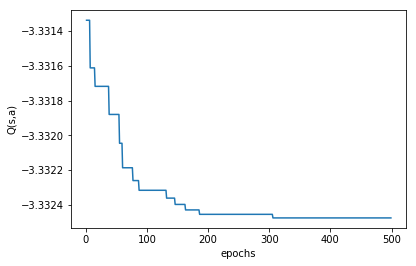


Number of episodes to complete task:


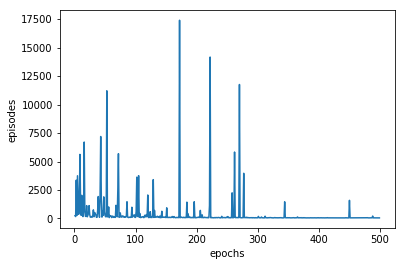

In [13]:
print("Q table size: " , len(Qt.table))
print("alpha: " , Qt.get_alpha(epoch))
print("epsilon: ", epsilon)

print("\nSample Q(s,a) progress:")
print("sample state:", rand_s.value())
print("sample action: ", rand_a)
print("Q(s,a) value:", Qt.get_Q(rand_s, rand_a).value)
plt.plot(epoch_list, q_list)
plt.xlabel('epochs')
plt.ylabel('Q(s,a)')
plt.show()

print("\nNumber of episodes to complete task:")
plt.plot(epoch_list, episode_list)
plt.xlabel('epochs')
plt.ylabel('episodes')
plt.show()

In [14]:
# save Qtable and policy to disk
import datetime
time_stamp = datetime.datetime.fromtimestamp(time.time()).strftime('%Y-%m-%d %H-%M-%S')
filename = 'q_data_3grids_' + time_stamp + '.pkl'
print(len(Qt.table))
print(len(pi.sa_dict))
rl.save_data(q_table=Qt, policy=pi, filename=filename)

776965
130823


In [15]:
gui = tk.Tk()
env = Environment(gui=gui, grid=grid)
    
a_e = 'e'
a_w = 'w'
a_n = 'n'
a_s = 's'
a_p = 'p'
a_d = 'd'

print("State: Taxi is at (0,0) with passenger at (0,6) waiting to be picked up")
s_1 = get_state(env, taxi_i=0, taxi_j=0, pass_i=9, pass_j=4, pass_picked=False)

print("state value:", s_1.value())
print("Q(s, east) value:", Qt.get_Q(s_1, a_e).value)
print("Q(s, west) value:", Qt.get_Q(s_1, a_w).value)
print("Q(s, north) value:", Qt.get_Q(s_1, a_n).value)
print("Q(s, south) value:", Qt.get_Q(s_1, a_s).value)
print("Q(s, pick) value:", Qt.get_Q(s_1, a_p).value)
print("Q(s, drop) value:", Qt.get_Q(s_1, a_d).value)
print("maxQ(s, a) value:", pi.get_maxQ_action(s_1, a_d))

print("\nState: Taxi is one cell to the west of destination with the passenger not picked up")
s_2 = get_state(env, taxi_i=env.dest_i-1, pass_picked=False)

print("state value:", s_2.value())
print("Q(s, east) value:", Qt.get_Q(s_2, a_e).value)
print("Q(s, west) value:", Qt.get_Q(s_2, a_w).value)
print("Q(s, north) value:", Qt.get_Q(s_2, a_n).value)
print("Q(s, south) value:", Qt.get_Q(s_2, a_s).value)
print("Q(s, pick) value:", Qt.get_Q(s_2, a_p).value)
print("Q(s, drop) value:", Qt.get_Q(s_2, a_d).value)
print("maxQ(s, a) value:", pi.get_maxQ_action(s_2, a_d))

State: Taxi is at (0,0) with passenger at (0,6) waiting to be picked up
state value: 0_0_9_4_19_14_0_1_1_1_0
Q(s, east) value: -2.517966998883298
Q(s, west) value: -2.6926074829792066
Q(s, north) value: -2.6926074829792066
Q(s, south) value: -2.434271758002713
Q(s, pick) value: -2.36200983858233
Q(s, drop) value: -2.36200983858233
maxQ(s, a) value: p

State: Taxi is one cell to the west of destination with the passenger not picked up
state value: 18_10_1_3_19_14_0_1_1_1_0
Q(s, east) value: -3.332475313774368
Q(s, west) value: -3.3324970434952093
Q(s, north) value: -3.332466033794817
Q(s, south) value: -3.3324934895633
Q(s, pick) value: -3.4660986047107953
Q(s, drop) value: -3.4629662523230613
maxQ(s, a) value: n


In [8]:
# test the trained model by choosing the best Q(s,a) using pi.get_maxQ_action
import time

# initialize environment
gui = tk.Tk()
env = Environment(gui=gui, grid=grid)

# get initial <s1, a1, s2, r>
s1 = get_state(env)
a1 = 'e'
s2 = rl.state()
r = 0     
episode = 0

while not env.task_complete:
    episode += 1
    # choose action to take in state s1
    allowed_actions = env.get_allowed_actions()
    a1 = pi.get_maxQ_action(s=s1, allowed_actions=allowed_actions)
    r = env.execute_action(a1)

    # get state s2
    s2 = get_state(env)

#     # create expericne tuple <s1,a1,s2,r>
#     exp = rl.experience(s1, a1, s2, r)
#     # update Q(s1,a1) using <s1,a1,s2,r>
#     Qt.update(exp=exp, pi=pi, epoch=epoch)
#     # update the policy with our updated Q(s1,a1) value
#     pi.update(s1, a1, Qt.get_Q(s1, a1))

    s1 = s2  

    # update Tkinter gui
    time.sleep(0.2)
    gui.update_idletasks()
    gui.update()
    
gui.quit()
gui.destroy()
print("episodes: %d" % episode)

episodes: 51
